**Problem Statement**
We are a growing supplement business with sales across multiple online platforms (Amazon, Walmart, etc.) and various product categories.
Despite steady revenue, we lack a comprehensive, granular understanding of the key factors driving our sales performance, customer behavior, and platform efficiency. Specifically, we do not have clear answers to critical business questions, such as:

1-What are the core seasonal trends and patterns in sales and returns?

2-Which product categories and individual products are  top performing  or are primed for market expansion?

3-How do pricing, discounts, and promotions impact gross and net revenue across different sales platforms?

4-Which platforms (Amazon, Walmart, etc.) and geographic locations offer the highest ROI?




**Import Libraies**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore")

**Loading dataset**

In [263]:
df=pd.read_csv("/content/drive/MyDrive/Data.csv")


**Pre-liminary Data Analysis**

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4384 non-null   object 
 1   Product Name    4384 non-null   object 
 2   Category        4384 non-null   object 
 3   Units Sold      4384 non-null   int64  
 4   Price           4384 non-null   float64
 5   Revenue         4384 non-null   float64
 6   Discount        4384 non-null   float64
 7   Units Returned  4384 non-null   int64  
 8   Location        4384 non-null   object 
 9   Platform        4384 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 342.6+ KB


In [11]:
df.head(2) #top rows

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon


In [18]:
df['Date']=pd.to_datetime(df['Date']) #Object data type date conversion to correct format

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4384 entries, 0 to 4383
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            4384 non-null   datetime64[ns]
 1   Product Name    4384 non-null   object        
 2   Category        4384 non-null   object        
 3   Units Sold      4384 non-null   int64         
 4   Price           4384 non-null   float64       
 5   Revenue         4384 non-null   float64       
 6   Discount        4384 non-null   float64       
 7   Units Returned  4384 non-null   int64         
 8   Location        4384 non-null   object        
 9   Platform        4384 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 342.6+ KB


In [20]:
df.isna().sum() #checking missing values

,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [25]:
df.duplicated().sum() #checking duplicate values

np.int64(0)

In [29]:
df.describe(include=object) #checking statistical summary for categorical columns

,Product Name,Category,Location,Platform
count,4384,4384,4384,4384
unique,16,10,3,3
top,Whey Protein,Vitamin,Canada,iHerb
freq,274,822,1507,1499


In [59]:
df['Month'] = df['Date'].dt.month #extracts month from date
df['Year'] = df['Date'].dt.year #extracts year from date
df['Day']=df['Date'].dt.day #extracts day from date


In [76]:
df.inplace=True

In [77]:
df.head()

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Month,Year,Day
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,1,2020,6
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,1,2020,6
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,1,2020,6
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,1,2020,6
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,1,2020,6


### Daily Sales Trend

In [94]:
daily_sales=df.groupby('Date').agg({'Revenue':'sum',
                        'Units Sold':'sum',
                        'Units Returned':'sum'}).reset_index()

In [95]:
daily_sales

,Date,Revenue,Units Sold,Units Returned
0,2020-01-06,71848.56,2406,19
1,2020-01-13,72416.18,2374,27
2,2020-01-20,76152.42,2370,26
3,2020-01-27,70306.73,2397,29
4,2020-02-03,98011.64,2384,34
...,...,...,...,...
269,2025-03-03,66065.44,2431,36
270,2025-03-10,92509.57,2411,30
271,2025-03-17,65590.53,2381,22
272,2025-03-24,69778.44,2416,27


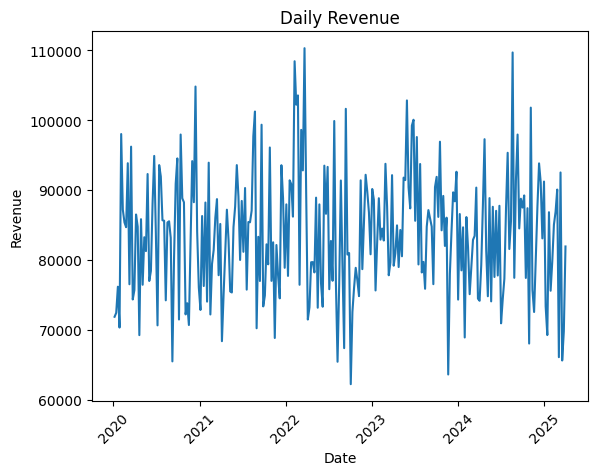

In [143]:
sns.lineplot(x='Date',y='Revenue',data=daily_sales)
plt.title('Daily Revenue')
plt.xticks(rotation=45)
plt.show()


**Interpretation** : Year 2022 and the mid of 2024-2025 generated highest of the revenue as compared to other years.

In [105]:
daily_sales_days=df.groupby('Day').agg({'Revenue':'sum',
                        'Units Sold':'sum',
                        'Units Returned':'sum'}).reset_index()

In [106]:
daily_sales_days

,Day,Revenue,Units Sold,Units Returned
0,1,689750.86,21755,239
1,2,690561.49,19399,195
2,3,804746.19,23936,297
3,4,726120.68,21692,195
4,5,638538.30,19243,172
5,6,860651.74,26232,278
6,7,698053.12,19341,193
7,8,726912.68,21503,214
8,9,692725.08,19183,186
9,10,830189.13,24131,246


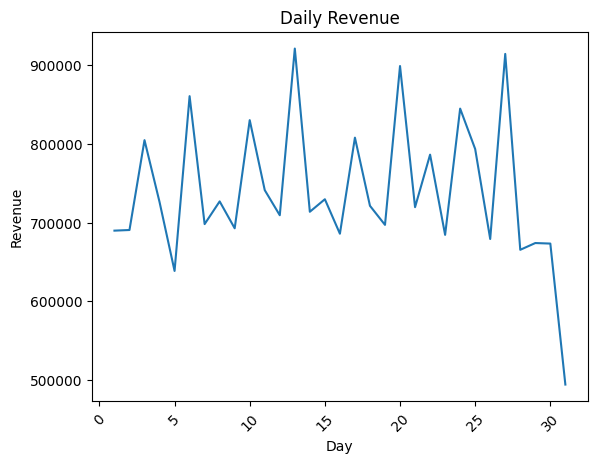

In [111]:
sns.lineplot(x='Day',y='Revenue',data=daily_sales_days)
plt.title('Daily Revenue')
plt.xticks(rotation=45)
plt.show()


**Interpretation**:
Maximum revenue is generated in 12-14 dates of the month.
In End of month revenue falls.
Focus must be on the mid of month by some special offers and people would likely buy more in these days.

In [92]:
daily_sales_month=df.groupby('Month').agg({'Revenue':'sum',
                        'Units Sold':'sum',
                        'Units Returned':'sum'}).reset_index()

In [90]:
daily_sales_month

,Month,Revenue,Units Sold,Units Returned
0,1,2171966.05,64780,667
1,2,2073046.84,57440,571
2,3,2271026.40,65398,665
3,4,1685662.30,50644,484
4,5,1920081.21,55125,527


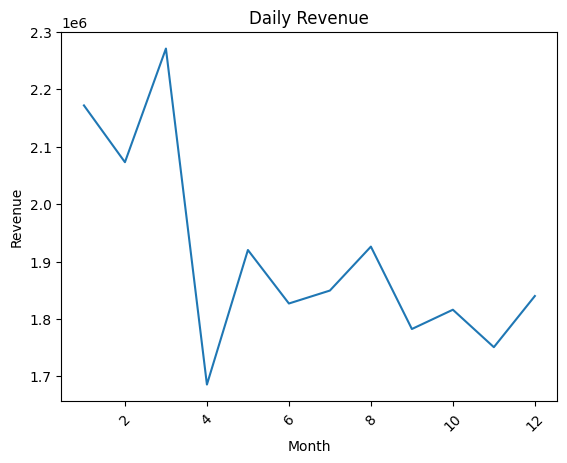

In [109]:
sns.lineplot(x='Month',y='Revenue',data=daily_sales_month)
plt.title('Daily Revenue')
plt.xticks(rotation=45)
plt.show()


**Interpretations**:
Maximum revenue is generated in March
Revenue falls completely on april.

In [116]:
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

,Revenue
Category,
Vitamin,4300224.68
Mineral,4276107.99
Performance,2909702.18
Protein,2855492.09
Amino Acid,1464819.63
Omega,1451065.87
Fat Burner,1440900.05
Hydration,1411951.38
Herbal,1405700.79


###Categories-wise Reveneue Generation

In [128]:
df.groupby('Category')['Revenue'].sum().sort_values(ascending=False).head(2)

,Revenue
Category,
Vitamin,4300224.68
Mineral,4276107.99


**Top selling categories are vitamin and mineral.**






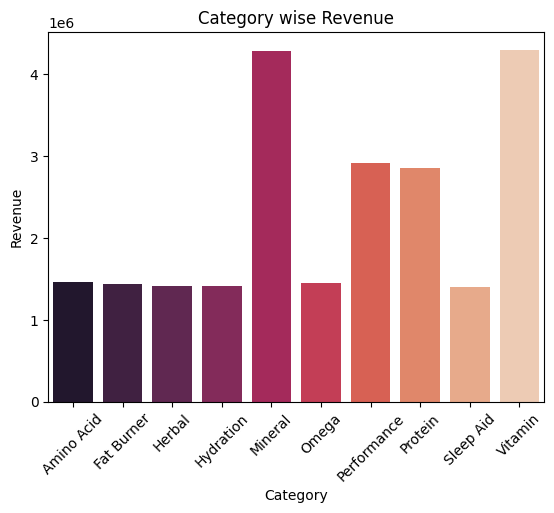

In [141]:
sns.barplot(x=category_revenue.index,y=category_revenue.values,palette='rocket')
plt.title('Category wise Revenue')
plt.ylabel('Revenue')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

**Top Performing Categories**: Vitamins and Minerals are the top two categories generating the highest revenue, both exceeding 4 million.
**Mid-Range Categories**: Performance and Protein categories also contribute significantly to the revenue, both around 2.8-2.9 million.
**Lower Performing Categories**: The remaining categories (Amino Acid, Omega, Fat Burner, Hydration, Herbal, and Sleep Aid) generate considerably less revenue, all falling below 1.5 million.

In [139]:
category_revenue = df.groupby('Category')['Revenue'].sum()
total_revenue = category_revenue.sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100
print("Percentage of Total Revenue by Category:")
display(category_revenue_percentage.sort_values(ascending=False))

Percentage of Total Revenue by Category:


,Revenue
Category,
Vitamin,18.767390
Mineral,18.662138
Performance,12.698759
Protein,12.462171
Amino Acid,6.392885
Omega,6.332860
Fat Burner,6.288493
Hydration,6.162153
Herbal,6.134874


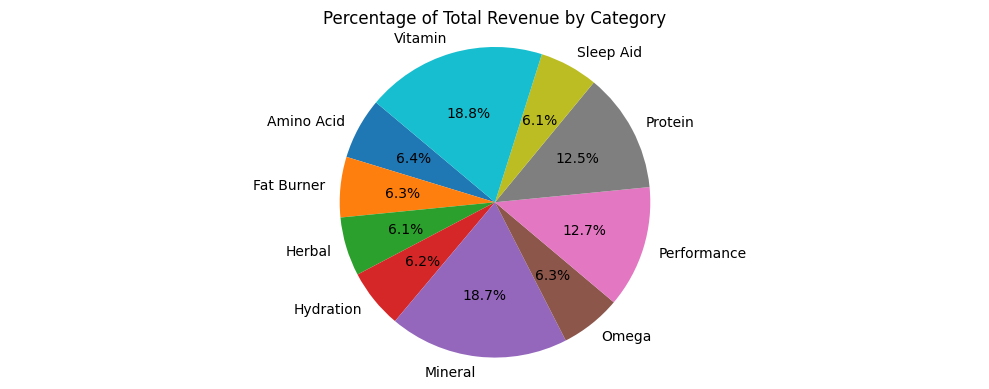

In [134]:
plt.figure(figsize=(10, 4))
plt.pie(category_revenue_percentage, labels=category_revenue_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Revenue by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

### Location-wise Revenue

In [144]:
df

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform,Month,Year,Day
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,1,2020,6
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,1,2020,6
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,1,2020,6
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,1,2020,6
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,1,2020,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb,3,2025,31
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart,3,2025,31
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb,3,2025,31
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon,3,2025,31


In [178]:
locations=df.groupby(["Location","Platform"])['Revenue'].sum().unstack().fillna(0)
locations



Platform,Amazon,Walmart,iHerb
Location,,,
Canada,2613844.28,2518639.07,2716096.38
UK,2442671.23,2637066.25,2624222.86
USA,2612936.27,2232862.30,2514941.81


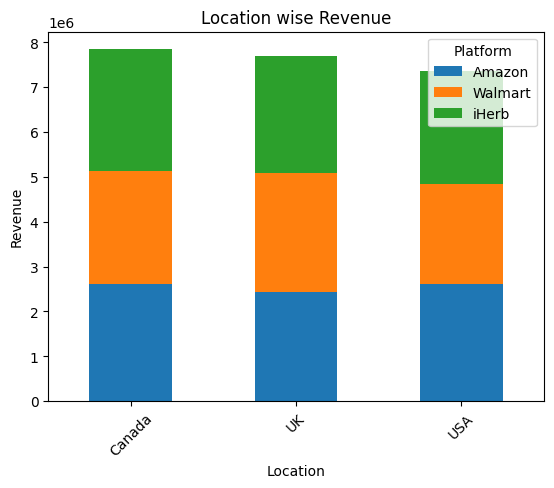

In [191]:
locations.plot(kind='bar',stacked=True)
plt.xlabel('Location')
plt.ylabel('Revenue')
plt.title('Location wise Revenue')
plt.xticks(rotation=45)
plt.show()

**Overall Revenue:**

1-Canada seems to be generating the highest overall revenue.
In Canada, iHerb is the top-performing platform, followed by Amazon and then Walmart.

2-In the UK, Walmart is the top-performing platform, followed by iHerb and then Amazon.
3-In the USA, Amazon is the top-performing platform, followed by iHerb and then Walmart.

**Platform Consistency**:

1-iHerb appears to be a strong performer across all three locations, consistently contributing a significant portion of the revenue.
2-Amazon and Walmart's performance varies more by location.

*This analysis suggests that Canada is the leading market and is  the preferred platform for customers.*

###Product-wise Revenue

In [215]:
products=df.groupby(['Product Name'])['Revenue'].sum().sort_values(ascending=False)
products

,Revenue
Product Name,
Biotin,1486798.62
Zinc,1482546.95
Pre-Workout,1477183.78
BCAA,1464819.63
Fish Oil,1451065.87
Green Tea Extract,1440900.05
Collagen Peptides,1433297.24
Creatine,1432518.40
Iron Supplement,1431582.41


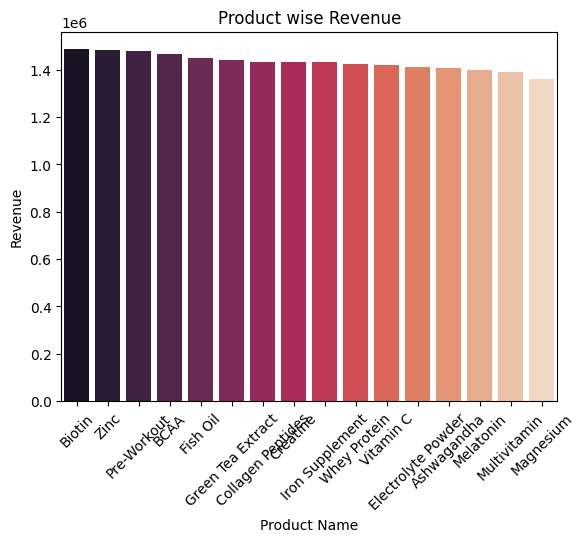

In [222]:
sns.barplot(x=products.index,y=products.values,palette='rocket')
plt.title('Product wise Revenue')
plt.ylabel('Revenue')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

**Top revenue generating products include Biotin  and least perfroming is  Magnesium.**



In [248]:
### Average Category Return Rate
category_return=df.groupby('Category')['Units Returned'].mean().sort_values(ascending=False).reset_index()
category_return

,Category,Units Returned
0,Hydration,1.609489
1,Vitamin,1.572993
2,Amino Acid,1.562044
3,Performance,1.534672
4,Protein,1.525547
5,Fat Burner,1.521898
6,Mineral,1.521898
7,Sleep Aid,1.489051
8,Omega,1.485401
9,Herbal,1.430657


In [242]:
### Average Product Return Rate
product_return=df.groupby('Product Name')['Units Returned'].mean().sort_values(ascending=False).reset_index()
product_return

,Product Name,Units Returned
0,Vitamin C,1.667883
1,Electrolyte Powder,1.609489
2,Magnesium,1.572993
3,BCAA,1.562044
4,Collagen Peptides,1.558394
5,Pre-Workout,1.554745
6,Iron Supplement,1.554745
7,Multivitamin,1.551095
8,Green Tea Extract,1.521898
9,Creatine,1.514599


In [253]:
### Average category-wise product return rate
category_wise_product_return=df.groupby(['Category','Product Name'])['Units Returned'].mean().sort_values(ascending=False).reset_index()
category_wise_product_return



,Category,Product Name,Units Returned
0,Vitamin,Vitamin C,1.667883
1,Hydration,Electrolyte Powder,1.609489
2,Mineral,Magnesium,1.572993
3,Amino Acid,BCAA,1.562044
4,Protein,Collagen Peptides,1.558394
5,Performance,Pre-Workout,1.554745
6,Mineral,Iron Supplement,1.554745
7,Vitamin,Multivitamin,1.551095
8,Fat Burner,Green Tea Extract,1.521898
9,Performance,Creatine,1.514599


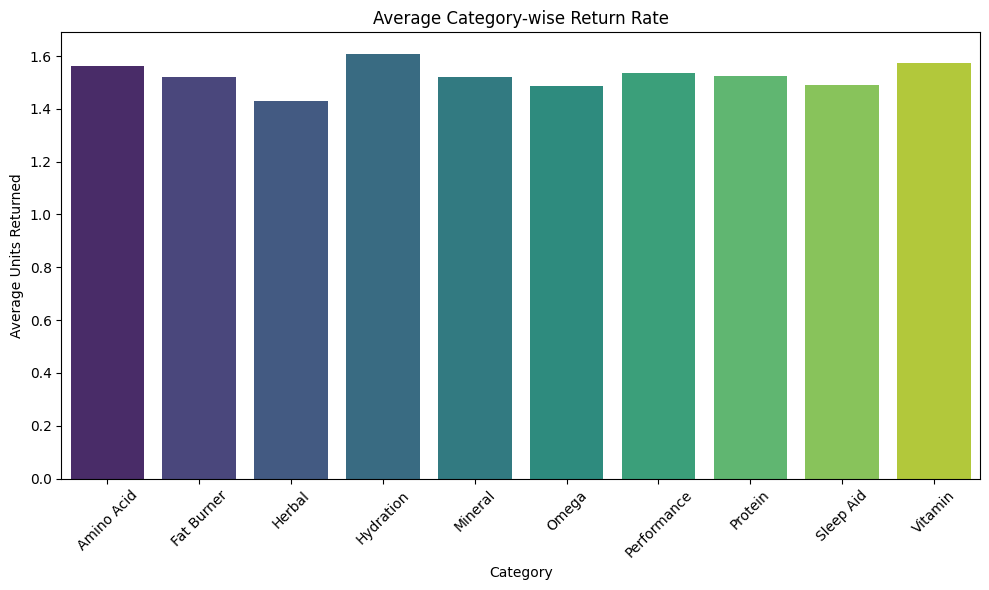

In [256]:
average_category_return_rate = df.groupby('Category')['Units Returned'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Units Returned', data=average_category_return_rate, palette='viridis')
plt.title('Average Category-wise Return Rate')
plt.ylabel('Average Units Returned')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

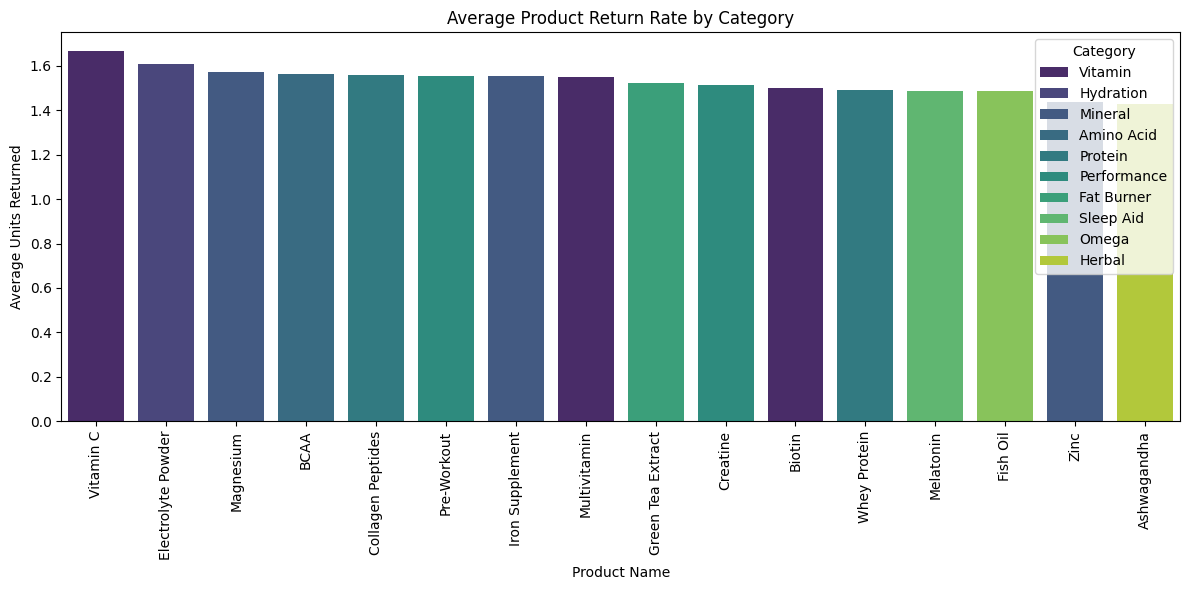

In [257]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product Name', y='Units Returned', hue='Category', data=category_wise_product_return, palette='viridis', dodge=False)
plt.title('Average Product Return Rate by Category')
plt.ylabel('Average Units Returned')
plt.xlabel('Product Name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [259]:
correlation=df[['Units Sold','Price','Discount','Revenue','Units Returned']].corr()
correlation

,Units Sold,Price,Discount,Revenue,Units Returned
Units Sold,1.000000,0.013749,-0.010435,0.210462,0.116523
Price,0.013749,1.000000,-0.008668,0.977198,-0.010410
Discount,-0.010435,-0.008668,1.000000,-0.012531,0.004276
Revenue,0.210462,0.977198,-0.012531,1.000000,0.012432
Units Returned,0.116523,-0.010410,0.004276,0.012432,1.000000


<Axes: >

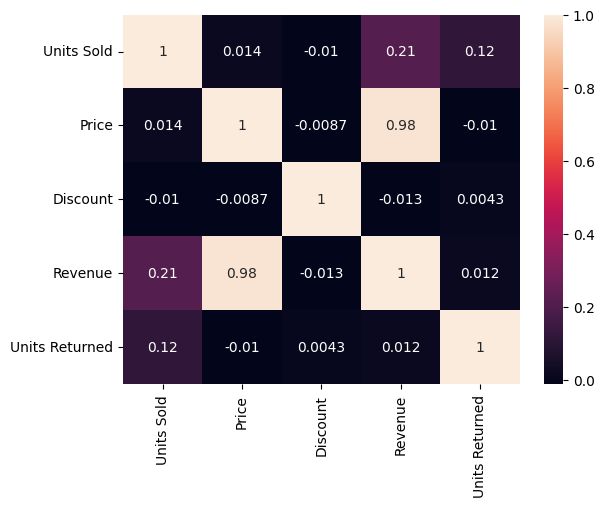

In [261]:
sns.heatmap(correlation,annot=True)

This plot doesnt give valuable information regarding our problem statement except weak correlation of discount with other metrics.

### Sugestions

1.  The analysis showed that revenue peaks in March and around the 12th-14th and 20th-27th of each month.
Consider running special promotions or increasing marketing efforts during these periods to maximize sales.
2.  Investigate the reasons for the significant drop in revenue in April and at the end of each month.
This could involve analyzing competitor activity, seasonal factors, or customer purchasing behavior during these times. Targeted campaigns or different product offerings might be beneficial.

3. Vitamins and Minerals are the highest revenue-generating categories.
4.  Categories like Herbal, Sleep Aid, Hydration, Fat Burner, Omega, and Amino Acid contribute significantly less to revenue. It is recommended to analyzing customer reviews and feedback to identify areas for improvement.

5. The analysis showed different platform dominance in each location (iHerb in Canada, Walmart in the UK, and Amazon in the USA).

6. Products like Vitamin C, Electrolyte Powder, and Magnesium have higher average return rates. Analyze the reasons for these returns. This could involve:
    *   Checking product quality and packaging.
    *   Ensuring accurate product descriptions and marketing.
    *   Improving customer support and return processes.
The very weak correlation between Discount and other metrics suggests that current discounting strategies may not be effectively driving sales or impacting returns
